## Creating graphs for the assessment

This notebook outputs the graphs required for the report, using the dataset with 20 iterations per condition.

In [1]:
# load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [3]:
# load results

# path
path_results = os.path.join('models', 'outputs', 'enhanced_iterations')

# Sugarscape 2
s2_df = pd.read_csv(
    os.path.join(path_results, 'Sugarscape 2 Constant Growback_edit metab_vision_pop-table.csv'),
    skiprows = 6
)

# Sugarscape 3
s3_df = pd.read_csv(
    os.path.join(path_results, 'Sugarscape 3 Wealth Distribution_edit metab-vision-pop-table.csv'),
    skiprows = 6
)


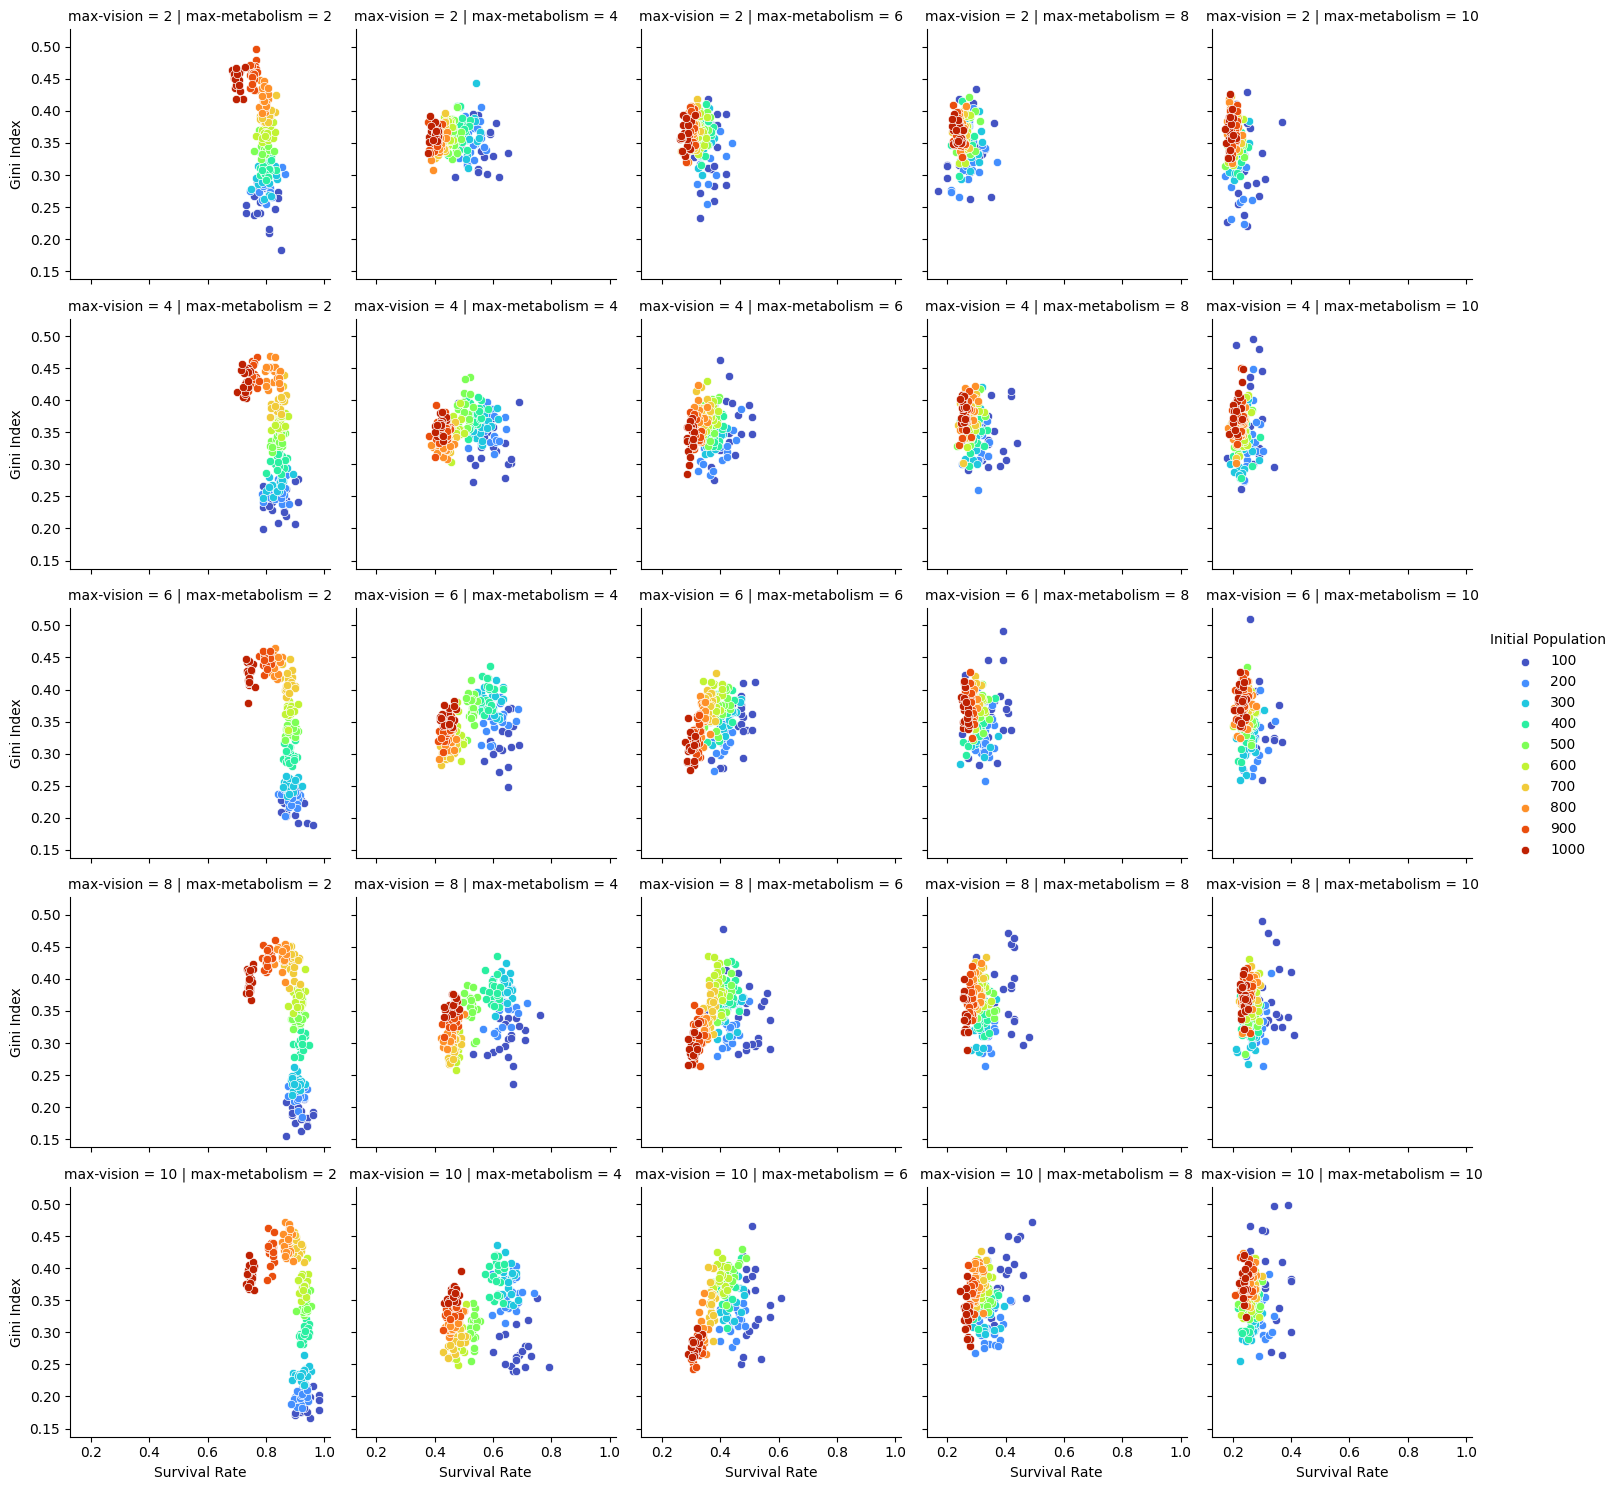

In [5]:
# create plot for s2

# init grid
s2_plot = sns.FacetGrid(
    s2_df,
    col = 'max-metabolism',
    row = 'max-vision',
    hue = 'initial-population',
    palette = 'turbo'
)

# create scatter plot
s2_plot.map(
    sns.scatterplot,
    'survival-rate',
    'gini-index'    
)

# add legend
s2_plot.add_legend(title = 'Initial Population')

# set labels
s2_plot.set_xlabels('Survival Rate')
s2_plot.set_ylabels('Gini Index')

# show plot
plt.show()
